# WeatherPy
----

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls


In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Set up lists to hold reponse info
lat = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

In [28]:
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    print(f"Processing record {cities.index(city)} of {len(cities)} | {city}")  
    response = requests.get(query_url + city).json()
   
    try: 
        lat.append(response['coord']['lat'])
    except:
        lat.append("Not Found")
    try:     
        maxtemp.append(response['main']['temp_max'])
    except: 
        maxtemp.append("Not Found")
    try: 
        humidity.append(response['main']['humidity'])
    except: 
        humidity.append("Not Found")
    try: 
        cloudiness.append(response['clouds']['all'])
    except: 
        cloudiness.append("Not Found")
    try: 
        windspeed.append(response['wind']['speed']) 
    except: 
        windspeed.append("Not Found")

Beginning Data Retrieval
-----------------------------
Processing record 0 of 599 | stokmarknes
Processing record 1 of 599 | hilo
Processing record 2 of 599 | sao joao da barra
Processing record 3 of 599 | sento se
Processing record 4 of 599 | maceio
Processing record 5 of 599 | bredasdorp
Processing record 6 of 599 | eureka
Processing record 7 of 599 | manggar
Processing record 8 of 599 | esperance
Processing record 9 of 599 | klaksvik
Processing record 10 of 599 | norman wells
Processing record 11 of 599 | punta arenas
Processing record 12 of 599 | hithadhoo
Processing record 13 of 599 | vaini
Processing record 14 of 599 | pevek
Processing record 15 of 599 | chuy
Processing record 16 of 599 | tsihombe
Processing record 17 of 599 | ushuaia
Processing record 18 of 599 | port alfred
Processing record 19 of 599 | rikitea
Processing record 20 of 599 | hobart
Processing record 21 of 599 | bambous virieux
Processing record 22 of 599 | jamestown
Processing record 23 of 599 | boende
Processin

Processing record 205 of 599 | le port
Processing record 206 of 599 | malangali
Processing record 207 of 599 | meulaboh
Processing record 208 of 599 | san patricio
Processing record 209 of 599 | bumba
Processing record 210 of 599 | port elizabeth
Processing record 211 of 599 | nome
Processing record 212 of 599 | moron
Processing record 213 of 599 | imeni babushkina
Processing record 214 of 599 | warrnambool
Processing record 215 of 599 | nouadhibou
Processing record 216 of 599 | gimli
Processing record 217 of 599 | haibowan
Processing record 218 of 599 | hovd
Processing record 219 of 599 | lorengau
Processing record 220 of 599 | flinders
Processing record 221 of 599 | ahar
Processing record 222 of 599 | atasu
Processing record 223 of 599 | tasiilaq
Processing record 224 of 599 | lake city
Processing record 225 of 599 | banjar
Processing record 226 of 599 | yumen
Processing record 227 of 599 | flin flon
Processing record 228 of 599 | santiago del estero
Processing record 229 of 599 | ma

Processing record 408 of 599 | mezen
Processing record 409 of 599 | porto novo
Processing record 410 of 599 | timbiqui
Processing record 411 of 599 | baker city
Processing record 412 of 599 | beyneu
Processing record 413 of 599 | dunedin
Processing record 414 of 599 | san juan bautista
Processing record 415 of 599 | bria
Processing record 416 of 599 | obihiro
Processing record 417 of 599 | kiama
Processing record 418 of 599 | leninskoye
Processing record 419 of 599 | saurimo
Processing record 420 of 599 | saint-pierre
Processing record 421 of 599 | cleethorpes
Processing record 422 of 599 | zhigansk
Processing record 423 of 599 | ust-maya
Processing record 424 of 599 | herat
Processing record 425 of 599 | portlethen
Processing record 426 of 599 | mount isa
Processing record 427 of 599 | babynino
Processing record 428 of 599 | plettenberg bay
Processing record 429 of 599 | takefu
Processing record 430 of 599 | vrangel
Processing record 431 of 599 | khani
Processing record 432 of 599 | c

In [29]:
# Create a data frame from cities, lat, maxtemp, humidity, cloudiness and windspeed
weather_dict = {
    "city": cities,
    "lat": lat,
    "maxtemp": maxtemp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed
}
weather_data = pd.DataFrame(weather_dict)

#Drop records that were not found
weather_df = weather_data.drop(weather_data[(weather_data.lat == "Not Found") | 
                                            (weather_data.maxtemp == "Not Found") |
                                            (weather_data.humidity == "Not Found") | 
                                            (weather_data.cloudiness == "Not Found") |
                                            (weather_data.windspeed == "Not Found") ].index)

weather_df.head()

,city,lat,maxtemp,humidity,cloudiness,windspeed
0,stokmarknes,68.56,59,67,20,8.05
1,hilo,19.71,80.01,83,20,4.7
2,sao joao da barra,-21.64,82.4,36,0,6.93
4,maceio,-9.67,75.2,88,75,19.46
5,bredasdorp,-34.53,59,72,0,13.87


### Convert Raw Data to DataFrame

In [30]:
#Count the number of objects in the dataframe
weather_df.count()

city          528
lat           528
maxtemp       528
humidity      528
cloudiness    528
windspeed     528
dtype: int64

In [31]:
#Export the data to a .csv file
weather_df.to_csv(r'output_data_file.csv')

In [32]:
#Display the dataframe
weather_df.head()

,city,lat,maxtemp,humidity,cloudiness,windspeed
0,stokmarknes,68.56,59,67,20,8.05
1,hilo,19.71,80.01,83,20,4.7
2,sao joao da barra,-21.64,82.4,36,0,6.93
4,maceio,-9.67,75.2,88,75,19.46
5,bredasdorp,-34.53,59,72,0,13.87


### Plotting the Data

#### Latitude vs. Temperature Plot

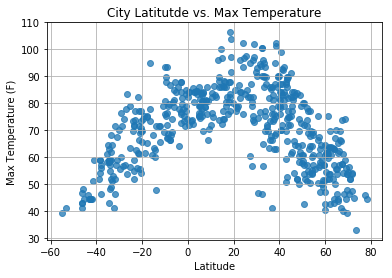

In [33]:
#Create scatterplot for latitude and max temperature
plt.scatter(weather_df["lat"], weather_df["maxtemp"], alpha=0.75)
plt.title('City Latitutde vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('Images/MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

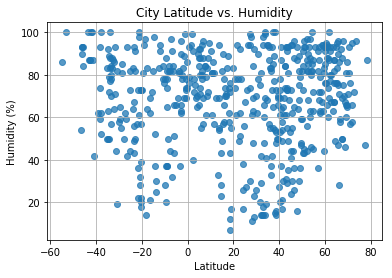

In [34]:
#Create scatterplot for latitude and humidity
plt.scatter(weather_df["lat"], weather_df["humidity"], alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('Images/Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

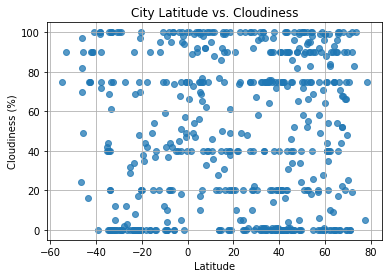

In [35]:
#Create scatterplot for latitude and cloudiness
plt.scatter(weather_df["lat"], weather_df["cloudiness"], alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('Images/Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

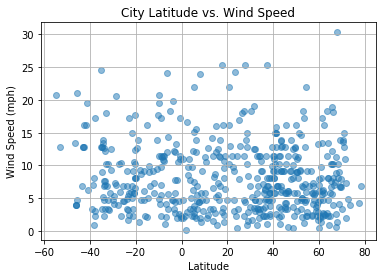

In [36]:
#Create scatterplot for latitude and windspeed
plt.scatter(weather_df["lat"], weather_df["windspeed"], alpha=0.5)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('Images/WindSpeed.png')
plt.show()